In [1]:
from rdkit.Chem import AllChem, MolFromSmiles, MolToSmiles, Draw
from rdkit.Chem.rdmolops import FastFindRings

from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import itertools

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Example Molecule

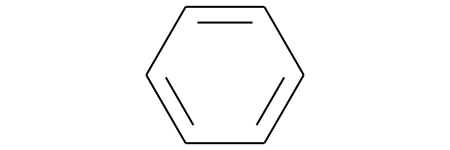

In [2]:
from rdkit.Chem.Draw import IPythonConsole

benzene = MolFromSmiles('c1ccccc1')
tmp=AllChem.Compute2DCoords(benzene)
benzene

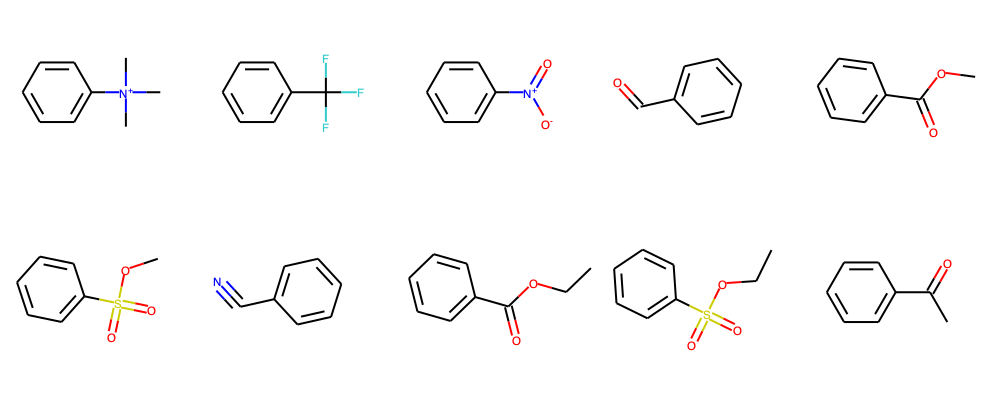

In [3]:
#Meta directing
meta1_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1][N+](C)(C)(C)')
meta2_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(F)(F)(F)')
meta3_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1][N+]([O-])=O')
meta4_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C=O')
meta5_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(=O)OC')
meta6_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]S(=O)(=O)OC')
meta7_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C#N')
meta8_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(=O)OCC')
meta9_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]S(=O)(=O)OCC')
meta10_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(=O)C')


meta_mols = []
meta_mols.append(meta1_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta2_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta3_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta4_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta5_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta6_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta7_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta8_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta9_rxn.RunReactants((benzene,))[0][0])
meta_mols.append(meta10_rxn.RunReactants((benzene,))[0][0])


for i,m in enumerate(meta_mols):
    tmp=AllChem.Compute2DCoords(m)
    m.UpdatePropertyCache()
    FastFindRings(m) #sanitation
img = Draw.MolsToGridImage(meta_mols, molsPerRow=5)
img

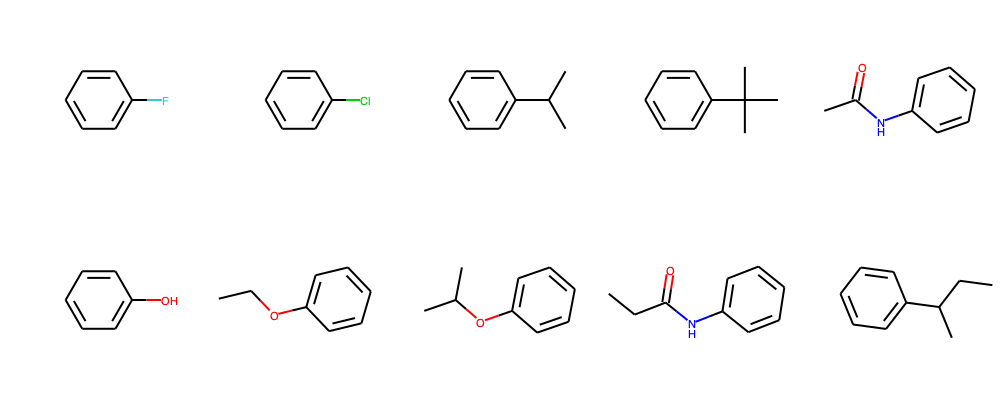

In [4]:
#Para directing:
para1_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]F')
para2_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]Cl')
para3_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(C)C')
para4_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(C)(C)C')
para5_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]NC(=O)C')
para6_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]O')
para7_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]OCC')
para8_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]OC(C)C')
para9_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]NC(=O)CC')
para10_rxn = AllChem.ReactionFromSmarts('[c:1] >> [c:1]C(C)CC')



para_mols = []
para_mols.append(para1_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para2_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para3_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para4_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para5_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para6_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para7_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para8_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para9_rxn.RunReactants((benzene,))[0][0])
para_mols.append(para10_rxn.RunReactants((benzene,))[0][0])


for i,m in enumerate(para_mols):
    tmp=AllChem.Compute2DCoords(m)
    m.UpdatePropertyCache()
    FastFindRings(m) #sanitation
img = Draw.MolsToGridImage(para_mols, molsPerRow=5)
img

# Some useful functions for enumerating reactions

In [5]:
def sanitize(mol):
    tmp=AllChem.Compute2DCoords(mol)
    mol.UpdatePropertyCache()
    FastFindRings(mol) #sanitation
    
def canonicalize(mol_list, showprogress=False):
    if showprogress:
        mol_list = [MolFromSmiles(MolToSmiles(mol)) for mol in tqdm(mol_list)]
    else:
        mol_list = [MolFromSmiles(MolToSmiles(mol)) for mol in mol_list] 
    mol_list = [mol for mol in mol_list if mol]
    mol_list = list(set([MolToSmiles(mol) for mol in mol_list]))
    if showprogress:
        mol_list = [MolFromSmiles(smi) for smi in tqdm(mol_list)]
    else:
        mol_list = [MolFromSmiles(smi) for smi in mol_list]
    return mol_list

def simple_rxn(mol_list, rxn, debug=False):
    prod_list = []
    for mol in mol_list:
        if debug:
            print('Input: '+ MolToSmiles(mol))
        products = rxn.RunReactants((mol,))
        if debug:
            print('Products: {}'.format(products))
        if products != ():
            for prod in products:
                if debug:
                    logging.info(prod)
                    logging.info(MolToSmiles(prod[0]))
                # prod_list.append(MolToSmiles(prod[0]))
                output = prod[0]
                try:
                    sanitize(output)
                    prod_list.append((output))
                except:
                    continue
    return canonicalize(prod_list)


# Generate all straight carbon skeletons with 10 carbons + change any 3 of them into double bonds

In [6]:
add_carbon = AllChem.ReactionFromSmarts('[C!H0:1] >> [C:1]C')
single_to_double = AllChem.ReactionFromSmarts('[C!H0!R:1][C!H0!R:2] >> [C:1]=[C:2]')

eth = MolFromSmiles('CC')
skeletons = [eth]
for i in tqdm(range(7)):
    prods = simple_rxn(skeletons, add_carbon)
    skeletons = skeletons + prods
    print('Length of list after adding {}-th carbon: {}'.format(i+1,len(skeletons)))
for i in tqdm(range(3)):
    doubles = simple_rxn(skeletons, single_to_double)
    skeletons = skeletons + doubles
    print('Length of list after adding {}-th double bond: {}'.format(i+1,len(skeletons)))    

  0%|          | 0/3 [00:00<?, ?it/s]

Length of list after adding 1-th carbon: 2
Length of list after adding 2-th carbon: 5
Length of list after adding 3-th carbon: 11
Length of list after adding 4-th carbon: 22
Length of list after adding 5-th carbon: 42
Length of list after adding 6-th carbon: 80
Length of list after adding 7-th carbon: 153


 33%|███▎      | 1/3 [00:00<00:00,  3.63it/s]

Length of list after adding 1-th double bond: 422


 67%|██████▋   | 2/3 [00:00<00:00,  2.46it/s]

Length of list after adding 2-th double bond: 1208


100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

Length of list after adding 3-th double bond: 2521


Number of straight chain carbons: 2521


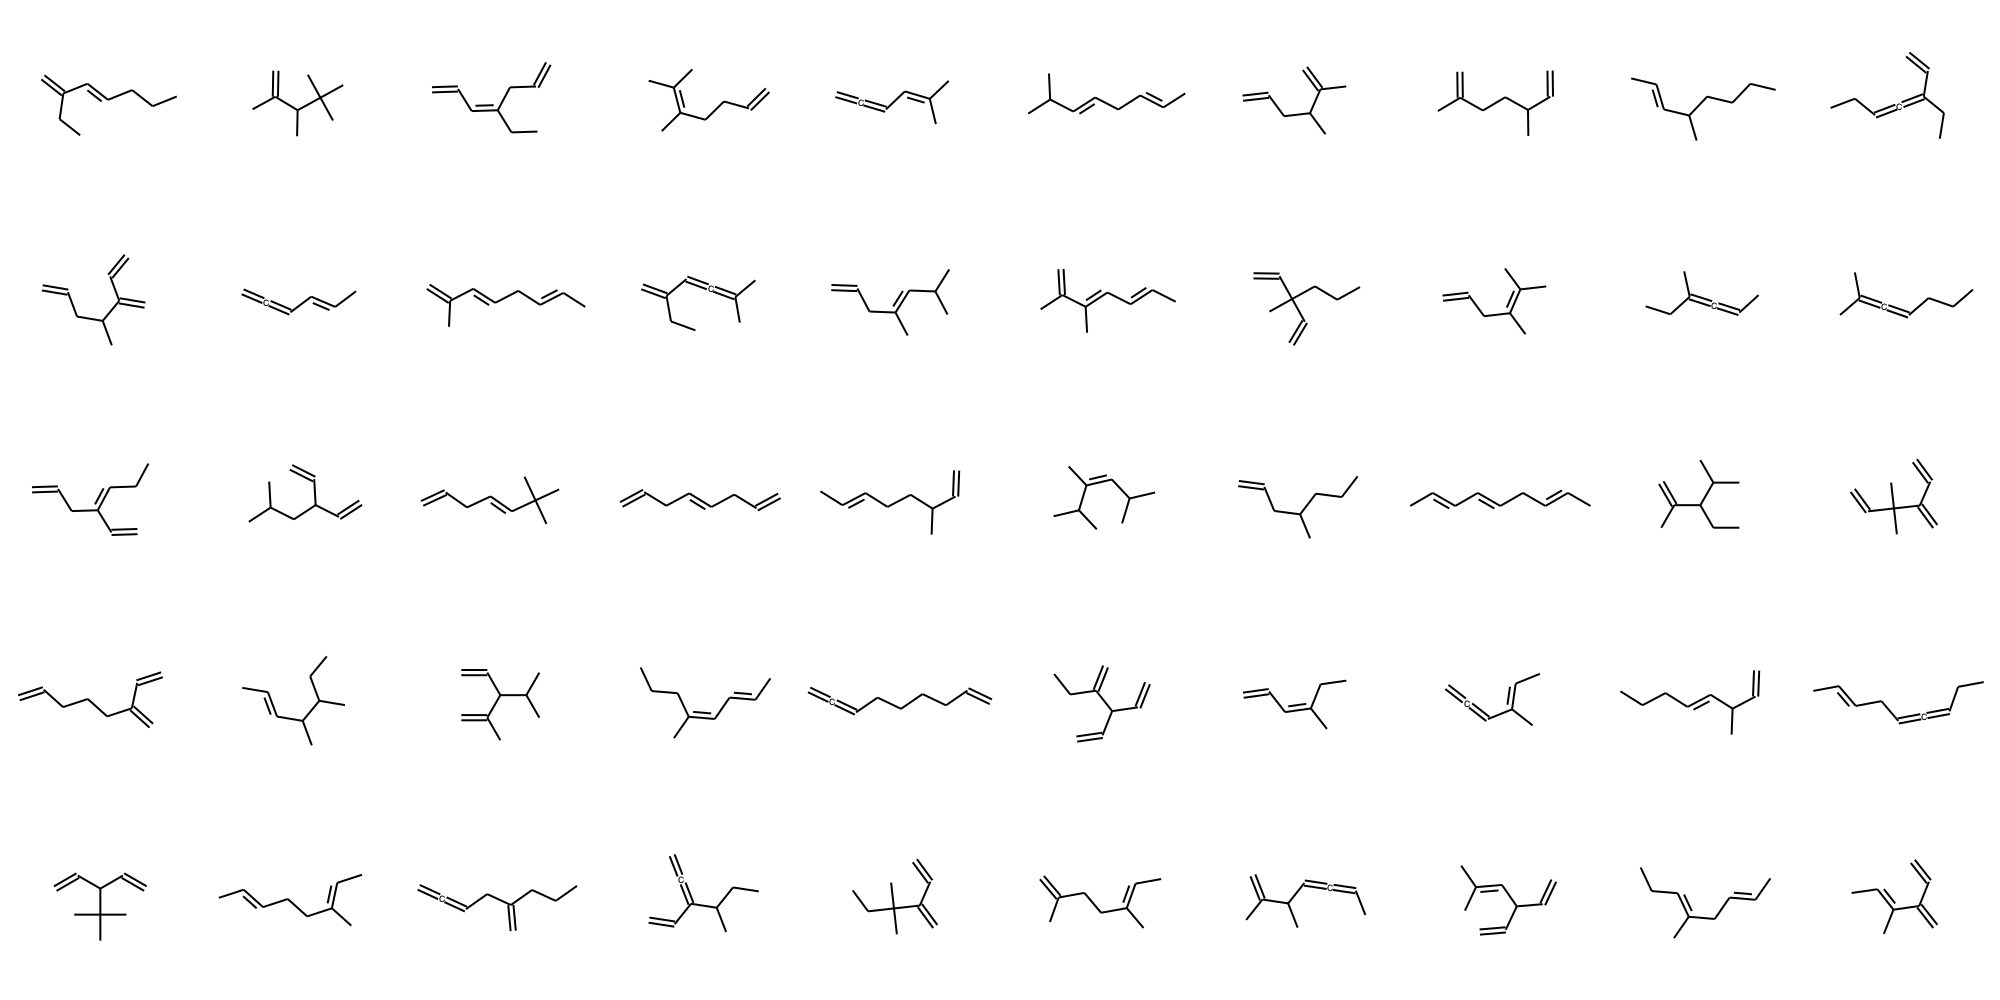

In [7]:
print('Number of straight chain carbons: {}'.format(len(skeletons)))
img = Draw.MolsToGridImage(skeletons[-50:], molsPerRow=10)
img

## Add 5 carbons to cyclobutane, cyclopentane, cyclohexane, mutate any two (non-ring) C-C bonds to double bonds

In [8]:
pent = MolFromSmiles('C1CCCC1')
but = MolFromSmiles('C1CCC1')
hexa = MolFromSmiles('C1CCCCC1')
cycloskeletons = [but,pent, hexa]
for i in tqdm(range(5)):
    prods = simple_rxn(cycloskeletons, add_carbon)
    cycloskeletons = cycloskeletons + prods
    print('Length of list after adding {}-th carbon: {}'.format(i+1,len(cycloskeletons)))
for i in tqdm(range(2)):
    doubles = simple_rxn(cycloskeletons, single_to_double)
    cycloskeletons = cycloskeletons + doubles
    print('Length of list after adding {}-th double bond: {}'.format(i+1,len(cycloskeletons)))

 80%|████████  | 4/5 [00:00<00:00, 21.77it/s]

Length of list after adding 1-th carbon: 6
Length of list after adding 2-th carbon: 22
Length of list after adding 3-th carbon: 67
Length of list after adding 4-th carbon: 204


  0%|          | 0/2 [00:00<?, ?it/s]

Length of list after adding 5-th carbon: 573


 50%|█████     | 1/2 [00:00<00:00,  1.74it/s]

Length of list after adding 1-th double bond: 1043


100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

Length of list after adding 2-th double bond: 1753


Number of cyclic chain carbons: 1753


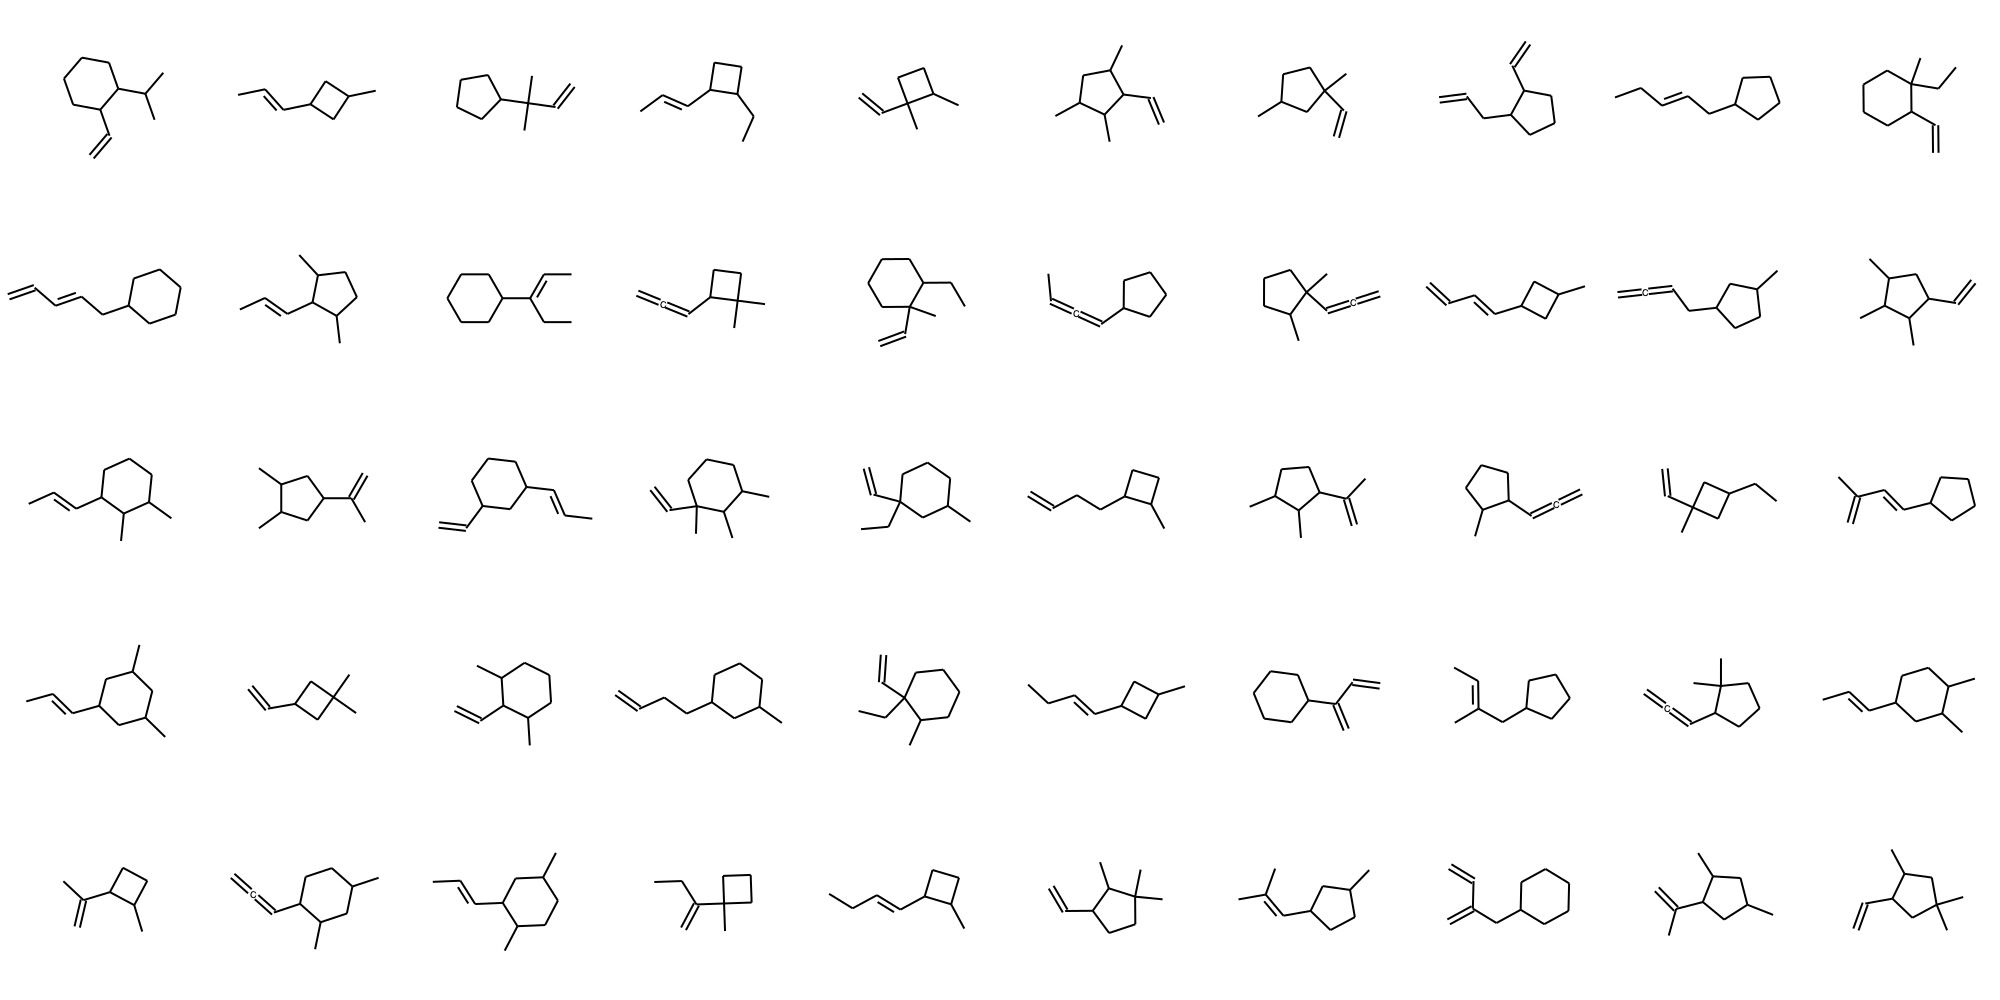

In [9]:
print('Number of cyclic chain carbons: {}'.format(len(cycloskeletons)))
img = Draw.MolsToGridImage(cycloskeletons[-50:], molsPerRow=10)
img

### Next, we randomly add acid chlorides to sp3 carbons with 3 hydrogens

In [10]:
add_acid = AllChem.ReactionFromSmarts('[CH3:1] >> [CH0:1](=O)Cl')
input = skeletons + cycloskeletons
acids = simple_rxn(input,add_acid)

print('Original number of carbon skeletons: {}'.format(len(skeletons)+len(cycloskeletons)))
print('Number of acid chlorides: {}'.format(len(acids)))

Original number of carbon skeletons: 4274
Number of acid chlorides: 4588


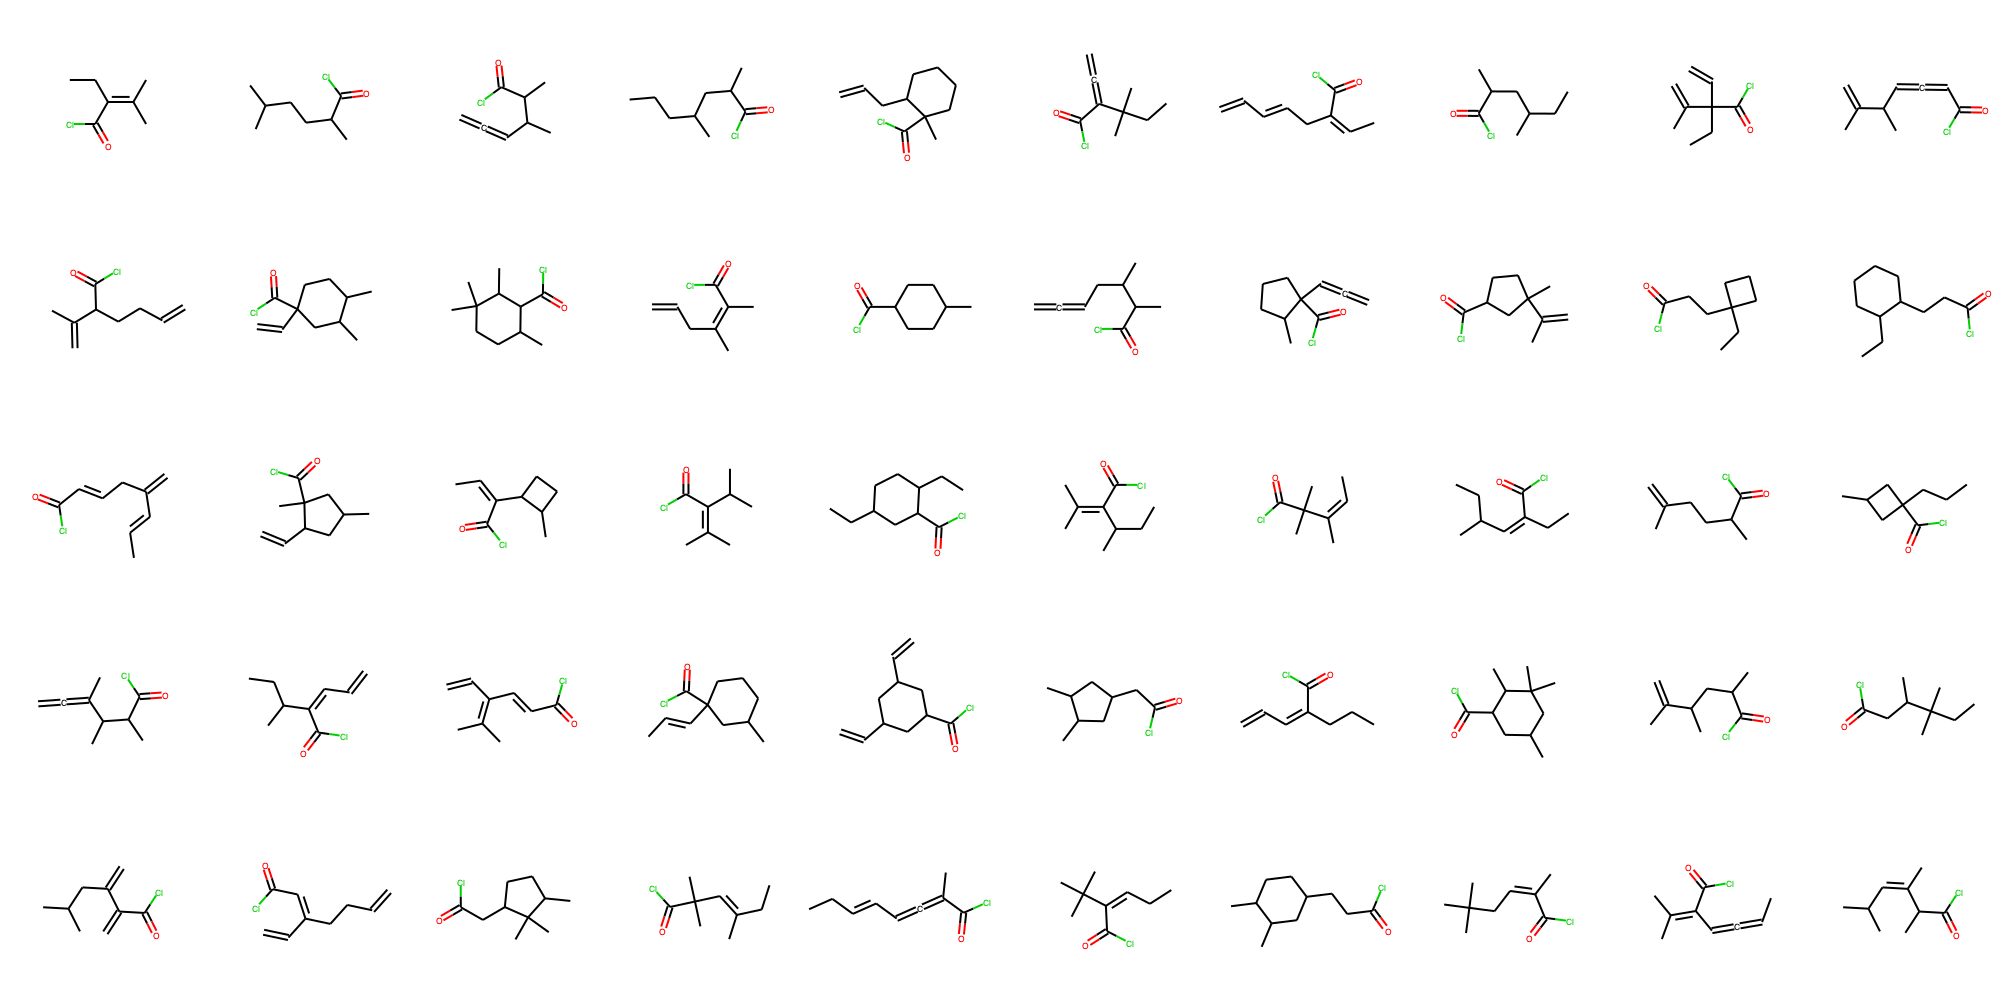

In [11]:
img = Draw.MolsToGridImage(acids[-50:], molsPerRow=10)
img

### Finally, combine the acid chlorides with the para- and meta- directing groups separately to generate two lists of reactant-reagent strings

In [12]:
para_srcs = []
for para_mol in tqdm(para_mols):
    para = MolToSmiles(para_mol)
    for acid in acids:
        acid = MolToSmiles(acid)
        para_srcs.append(MolToSmiles(MolFromSmiles(para+'.'+acid)))
print('Number of para-directing srcs: {}'.format(len(para_srcs)))

meta_srcs = []
for meta_mol in tqdm(meta_mols):
    meta = MolToSmiles(meta_mol)
    for acid in acids:
        acid = MolToSmiles(acid)
        meta_srcs.append(MolToSmiles(MolFromSmiles(meta+'.'+acid)))
print('Number of meta-directing srcs: {}'.format(len(meta_srcs)))

  0%|          | 0/10 [00:00<?, ?it/s]

Number of para-directing srcs: 45880


100%|██████████| 10/10 [00:14<00:00,  1.42s/it]

Number of meta-directing srcs: 45880


### Apply para- or meta- reaction templates to the lists of reactant-reagent strings

In [13]:
para_rxn = AllChem.ReactionFromSmarts('[*:1]-!:[c:2]1[c:3][c:4][c:5][c:6][c:7]1.[C:8](=[O:9])Cl>>[*:1]-!:[c:2]1[c:3][c:4][c:5]([C:8](=[O:9]))[c:6][c:7]1')
meta_rxn = AllChem.ReactionFromSmarts('[*:1]-!:[c:2]1[c:3][c:4][c:5][c:6][c:7]1.[C:8](=[O:9])Cl>>[*:1]-!:[c:2]1[c:3][c:4]([C:8](=[O:9]))[c:5][c:6][c:7]1')

def run_parameta(src,rxn):
    src_list = src.split('.')
    src_mols = [MolFromSmiles(mol) for mol in src_list]
    pred_list = []
    for pair in itertools.permutations(src_mols, r=2): # iterate over all src reactant pairings
        prods = rxn.RunReactants((pair[0],pair[1]))
        if prods!=():
            for mol in prods:
                pred_list.append(mol[0])
    return canonicalize(pred_list)[0]

para_prods=[]
for src in tqdm(para_srcs):
    para_prods.append(MolToSmiles(run_parameta(src, para_rxn)))
para_srcs = [src+'.'+'Cl[Al](Cl)Cl' for src in para_srcs]

meta_prods=[]
for src in tqdm(meta_srcs):
    meta_prods.append(MolToSmiles(run_parameta(src, meta_rxn)))
meta_srcs = [src+'.'+'Cl[Al](Cl)Cl' for src in meta_srcs]

100%|██████████| 45880/45880 [01:02<00:00, 732.21it/s]


In [14]:
print(meta_srcs[1])

CC=CC(CC)CC(=O)Cl.C[N+](C)(C)c1ccccc1.Cl[Al](Cl)Cl


### Define some functions for tokenization and augmentation

In [15]:
"""Script to remove duplicate reactions and unphysical products"""
from rdkit import RDLogger
import re

def smi_list_tokenizer(smi_list):
    """
    Tokenize a SMILES molecule or reaction
    """
    #print('\nTokenizing the reaction list')
    pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    smi_list_tokenized = []
    for smi in smi_list:
        tokens = [token for token in regex.findall(smi)]
        assert smi == ''.join(tokens)
        smi_list_tokenized.append(' '.join(tokens))
    #print('\nDone with tokenizing the reaction list')
    return smi_list_tokenized


def data_augm(rx_list):
    RDLogger.DisableLog('rdApp.*')
    rx_list_augm = rx_list.copy()
    for j, rx in enumerate(rx_list):
        rx_rand = rx
        i = 0
        while rx == rx_rand and i < 10:
            rx_mol = Chem.MolFromSmiles(rx)
            if rx_mol == None:
                print(rx)
            new_atom_order = list(range(rx_mol.GetNumAtoms()))
            random.shuffle(new_atom_order)
            random_mol = Chem.RenumberAtoms(rx_mol, newOrder=new_atom_order)
            rx_rand = Chem.MolToSmiles(random_mol, canonical=False, isomericSmiles=False)
            i += 1
        if rx_rand == rx:
            print('\nFailed to generate random equivalent SMILES for the reaction:')
            print(rx)
        else:
            rx_list_augm.append(rx_rand)
    #print('\nDone generating the augmented list')
    return rx_list_augm

def remove_last_char(rx_list):
    new_list = []
    for rx in rx_list:
        new_list.append(rx.rstrip('\n'))
    return new_list

In [18]:
print(para_srcs[:2])
print(data_augm(para_srcs[:2]))

['C=C(C(=O)Cl)C1CCCC(C)C1C.Fc1ccccc1.Cl[Al](Cl)Cl', 'CC=CC(CC)CC(=O)Cl.Fc1ccccc1.Cl[Al](Cl)Cl']
['C=C(C(=O)Cl)C1CCCC(C)C1C.Fc1ccccc1.Cl[Al](Cl)Cl', 'CC=CC(CC)CC(=O)Cl.Fc1ccccc1.Cl[Al](Cl)Cl', 'ClC(C(=C)C1CCCC(C)C1C)=O.Cl[Al](Cl)Cl.c1ccccc1F', 'ClC(CC(CC)C=CC)=O.Cl[Al](Cl)Cl.c1ccc(F)cc1']


### Split into train/val/test, augment + tokenize training set, only tokenize val and test sets

In [19]:
from sklearn.model_selection import train_test_split

para_src_train, para_src_test, para_tgt_train, para_tgt_test = train_test_split(para_srcs, para_prods,test_size=0.1)
para_src_train, para_src_val, para_tgt_train, para_tgt_val = train_test_split(para_src_train, para_tgt_train, test_size=0.111111)
meta_src_train, meta_src_test, meta_tgt_train, meta_tgt_test = train_test_split(meta_srcs, meta_prods, test_size=0.1)
meta_src_train, meta_src_val, meta_tgt_train, meta_tgt_val = train_test_split(meta_src_train, meta_tgt_train, test_size=0.111111)

train_rxns=[]
tokenized_para_srcs_train = smi_list_tokenizer(data_augm(para_src_train))
tokenized_para_prods_train = smi_list_tokenizer(para_tgt_train)
tokenized_para_prods_train = tokenized_para_prods_train + tokenized_para_prods_train
for i, src in tqdm(enumerate(tokenized_para_srcs_train), total = len(tokenized_para_srcs_train)):
    rxn = src+'>>'+tokenized_para_prods_train[i]
    train_rxns.append(rxn)
    
tokenized_meta_srcs_train = smi_list_tokenizer(data_augm(meta_src_train))
tokenized_meta_prods_train = smi_list_tokenizer(meta_tgt_train)
tokenized_meta_prods_train = tokenized_meta_prods_train + tokenized_meta_prods_train
for i, src in tqdm(enumerate(tokenized_meta_srcs_train), total = len(tokenized_meta_srcs_train)):
    rxn = src+'>>'+tokenized_meta_prods_train[i]
    train_rxns.append(rxn)
    
val_rxns=[]
tokenized_para_srcs_val = smi_list_tokenizer(para_src_val)
tokenized_para_prods_val = smi_list_tokenizer(para_tgt_val)
tokenized_para_prods_val = tokenized_para_prods_val
for i, src in tqdm(enumerate(tokenized_para_srcs_val), total = len(tokenized_para_srcs_val)):
    rxn = src+'>>'+tokenized_para_prods_val[i]
    val_rxns.append(rxn)
    
tokenized_meta_srcs_val = smi_list_tokenizer(meta_src_val)
tokenized_meta_prods_val = smi_list_tokenizer(meta_tgt_val)
tokenized_meta_prods_val = tokenized_meta_prods_val
for i, src in tqdm(enumerate(tokenized_meta_srcs_val), total = len(tokenized_meta_srcs_val)):
    rxn = src+'>>'+tokenized_meta_prods_val[i]
    val_rxns.append(rxn)
    
test_rxns=[]
tokenized_para_srcs_test = smi_list_tokenizer(para_src_test)
tokenized_para_prods_test = smi_list_tokenizer(para_tgt_test)
tokenized_para_prods_test = tokenized_para_prods_test
for i, src in tqdm(enumerate(tokenized_para_srcs_test), total = len(tokenized_para_srcs_test)):
    rxn = src+'>>'+tokenized_para_prods_test[i]
    test_rxns.append(rxn)
    
tokenized_meta_srcs_test = smi_list_tokenizer(meta_src_test)
tokenized_meta_prods_test = smi_list_tokenizer(meta_tgt_test)
tokenized_meta_prods_test = tokenized_meta_prods_test
for i, src in tqdm(enumerate(tokenized_meta_srcs_test), total = len(tokenized_meta_srcs_test)):
    rxn = src+'>>'+tokenized_meta_prods_test[i]
    test_rxns.append(rxn)

100%|██████████| 4588/4588 [00:00<00:00, 1406069.47it/s]


In [24]:
import os

with open('sear/train.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in train_rxns)
with open('sear/val.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in val_rxns)
with open('sear/test.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % rxn for rxn in test_rxns)
print('splits generated!')

bashCommand = "./sear/split_src_tgt.sh"
os.system(bashCommand)

splits generated!


0

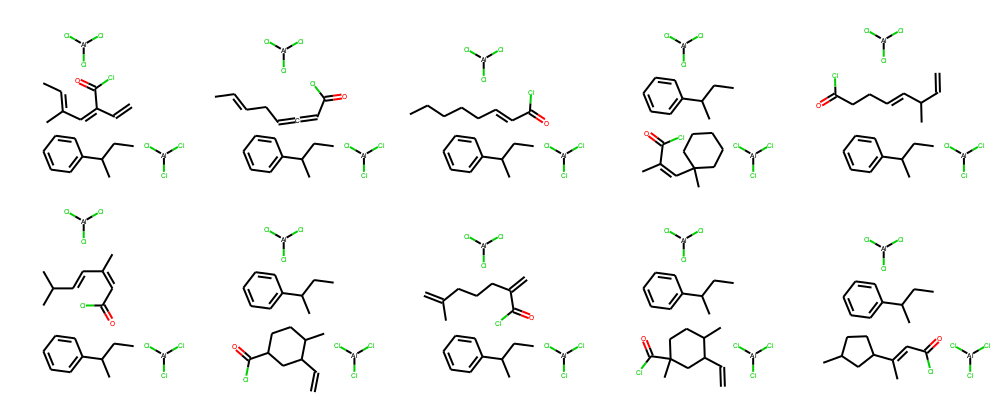

In [251]:
img = Draw.MolsToGridImage([MolFromSmiles(smi) for smi in para_srcs[-10:]], molsPerRow=5)
img

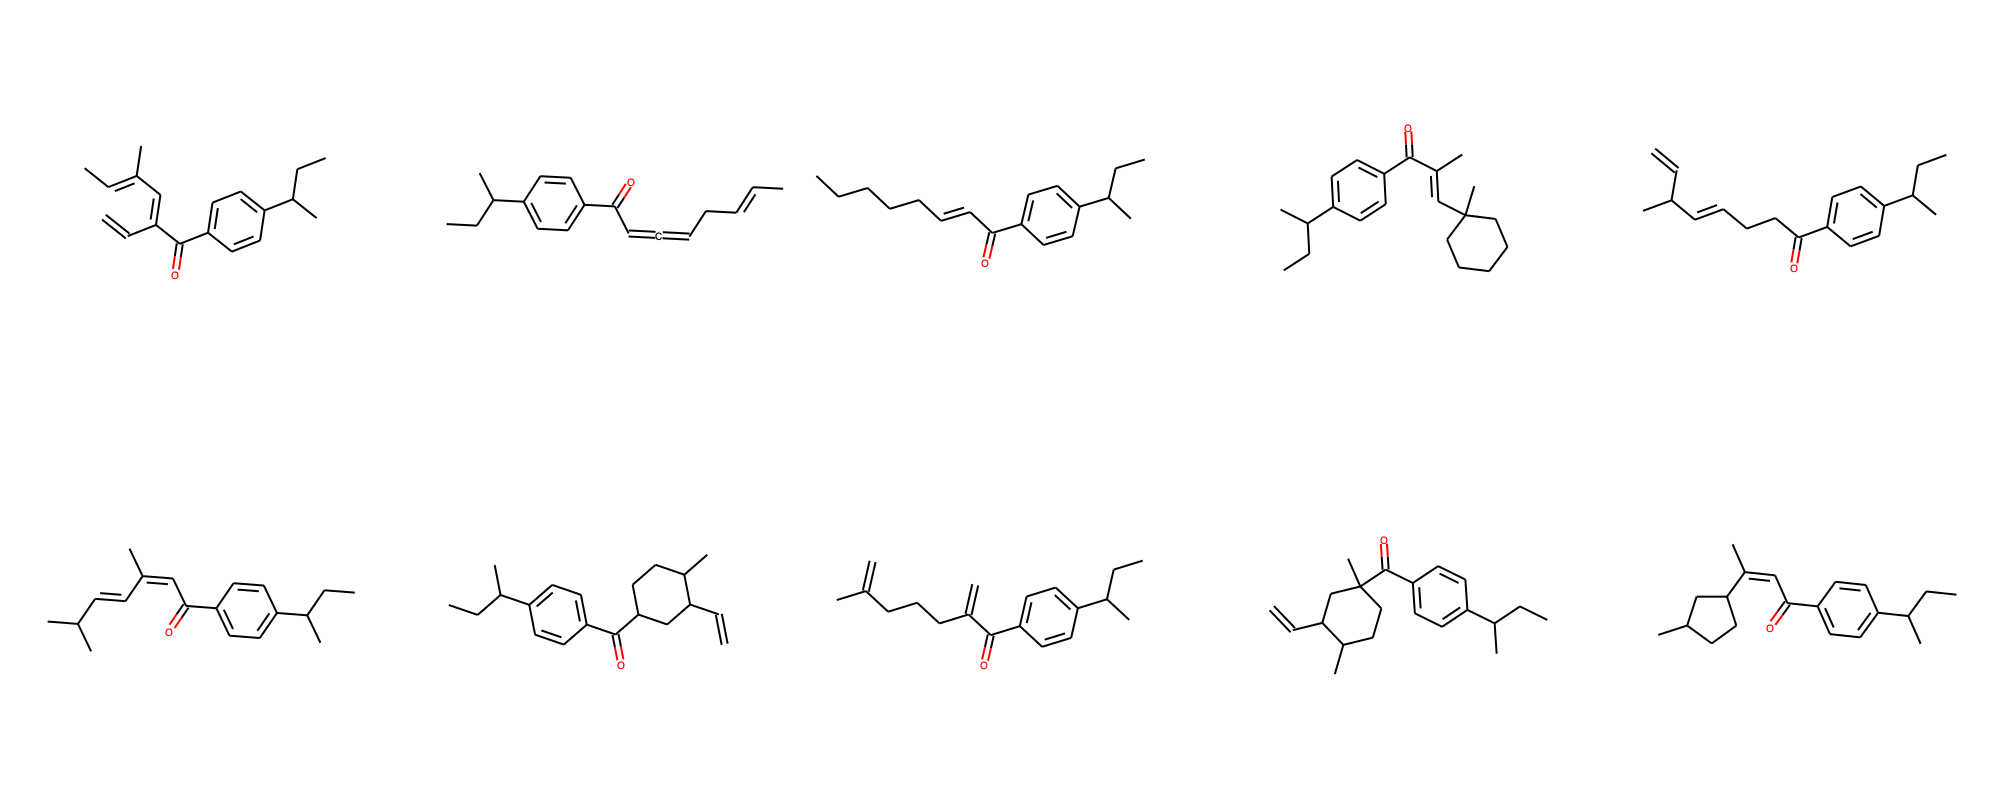

In [254]:
img = Draw.MolsToGridImage([MolFromSmiles(smi) for smi in para_prods[-10:]], molsPerRow=5, subImgSize=(400,400))
img

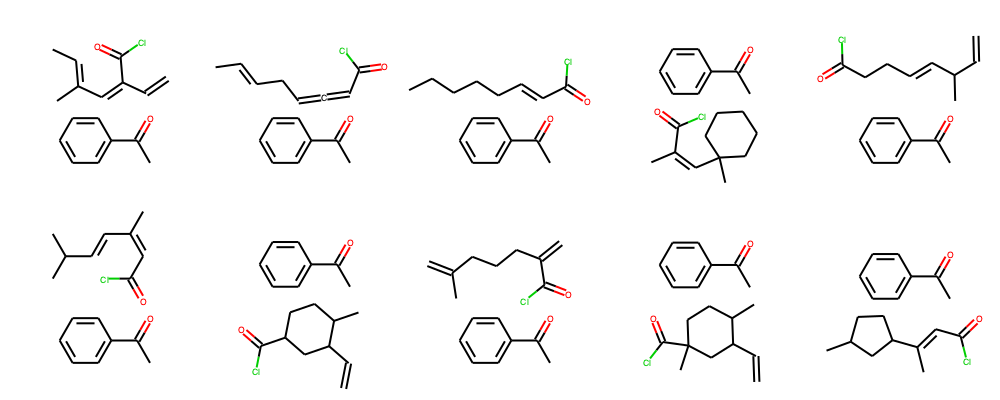

In [199]:
img = Draw.MolsToGridImage([MolFromSmiles(smi) for smi in meta_srcs[-10:]], molsPerRow=5)
img

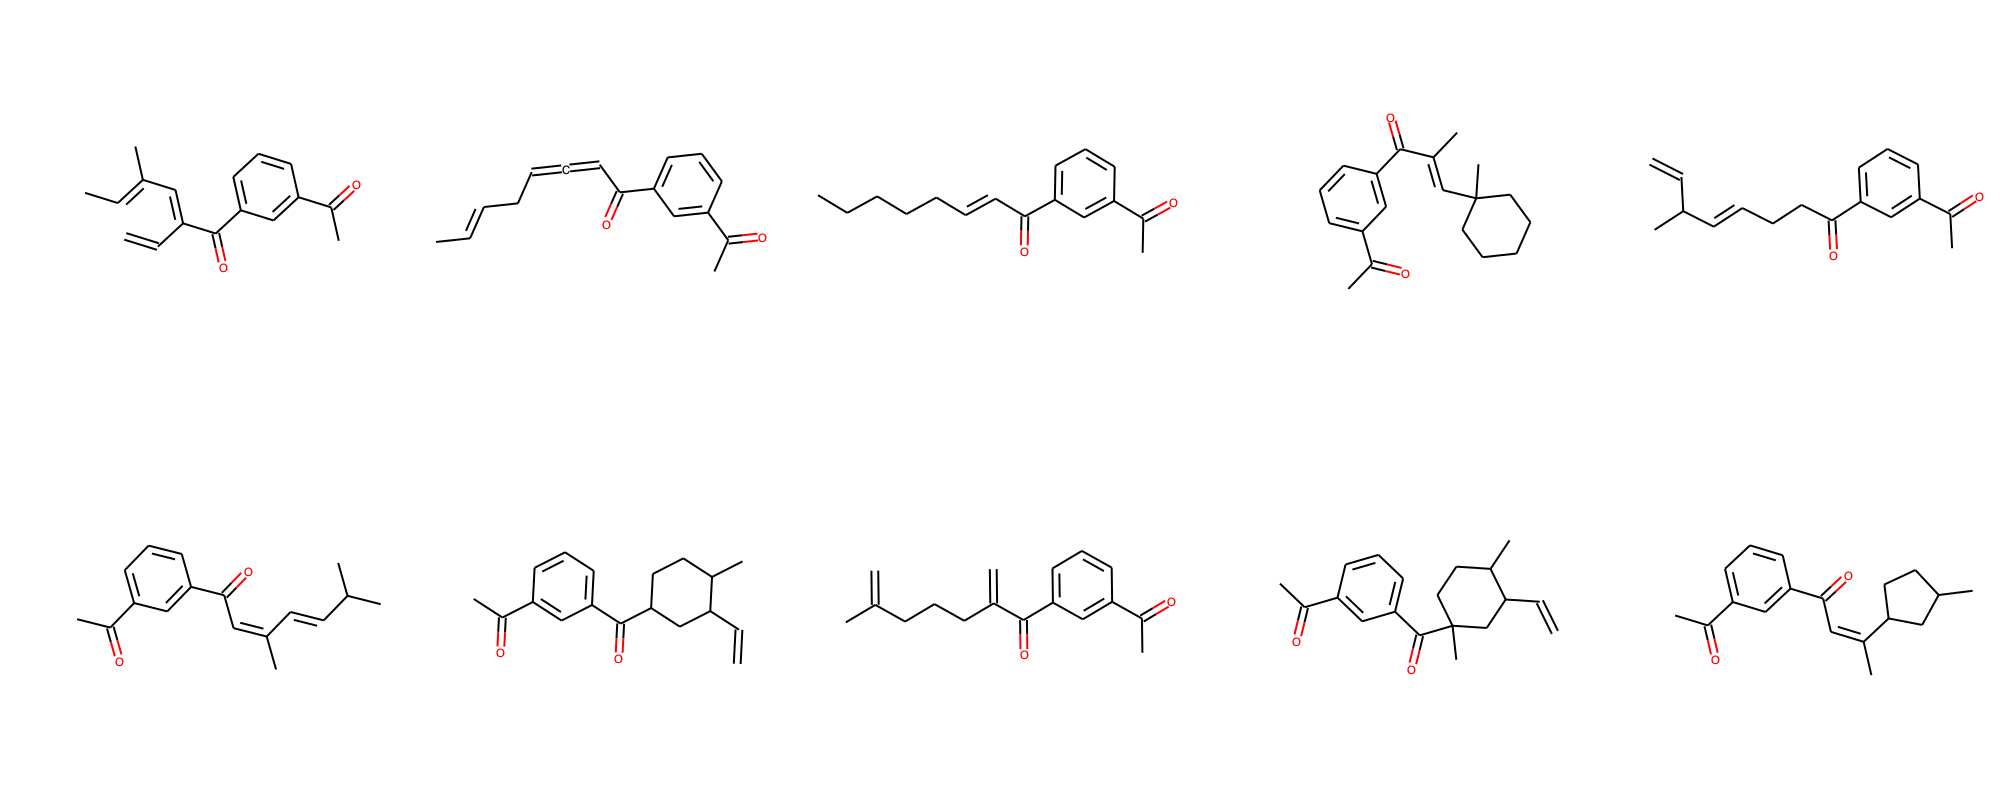

In [200]:
img = Draw.MolsToGridImage([mol[0] for mol in meta_prods[-10:]], molsPerRow=5, subImgSize=(400,400))
img